In [1]:
import numpy as np 
import pandas as pd 

import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Gold%20Price%20Data/gld_price_data.csv")
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
df.set_index(df['Date'],drop=True,inplace=True)
df.drop('Date',axis=1,inplace=True)
df

,SPX,GLD,USO,SLV,EUR/USD
Date,,,,,
2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692
2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491
2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492
2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299
2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789
2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722
2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753


In [6]:
df['day_of_year'] = df.index.day_of_year
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df

,SPX,GLD,USO,SLV,EUR/USD,day_of_year,day_of_week,month
Date,,,,,,,,
2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692,2,2,1
2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491,3,3,1
2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492,4,4,1
2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299,7,0,1
2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099,8,1,1
...,...,...,...,...,...,...,...,...
2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789,128,1,5
2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722,129,2,5
2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753,130,3,5


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

SPX            0
GLD            0
USO            0
SLV            0
EUR/USD        0
day_of_year    0
day_of_week    0
month          0
dtype: int64

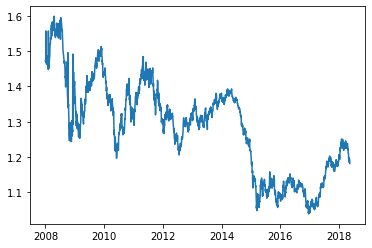

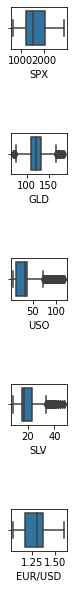

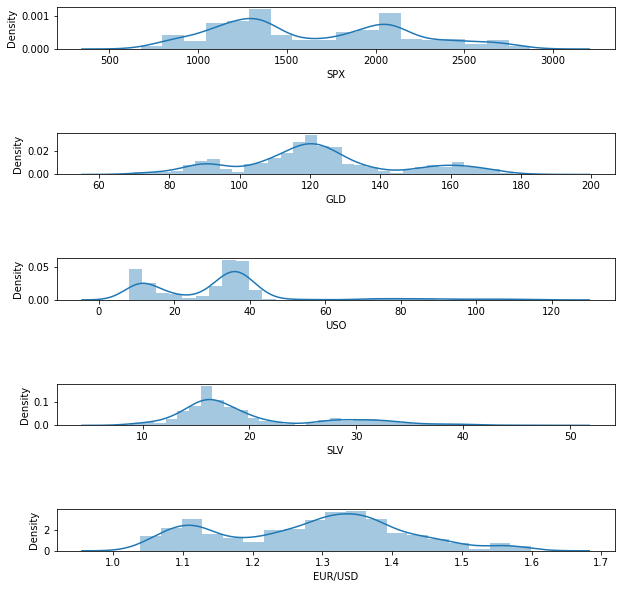

,name,r2
6,RandomForestRegressor,0.988046
7,XGBRegressor,0.984332
5,DecisionTreeRegressor,0.978884
9,GradientBoostingRegressor,0.966855
8,AdaBoostRegressor,0.915649
3,SVR,0.828612
0,LinearRegression,0.756393
1,Ridge,0.756381
4,LinearSVR,0.753103
2,Lasso,-0.000784


In [10]:
plt.plot(df.index, df['EUR/USD'])
plt.show()

cols = ['SPX','GLD','USO','SLV','EUR/USD']
fig ,ax = plt.subplots(ncols=1,nrows=len(cols),figsize=(1,10))
for i in range(len(cols)):
    sns.boxplot(df[cols[i]],ax = ax[i])
plt.subplots_adjust(hspace=2)
plt.show()

cols = ['SPX','GLD','USO','SLV','EUR/USD']
fig ,ax = plt.subplots(ncols=1,nrows=len(cols),figsize=(10,10))
for i in range(len(cols)):
    sns.distplot(df[cols[i]],ax = ax[i])
plt.subplots_adjust(hspace=2)
plt.show()
from sklearn.linear_model import Lasso ,LinearRegression ,Ridge
from sklearn.svm import SVR ,LinearSVR
from sklearn.naive_bayes import GaussianNB ,MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,AdaBoostRegressor ,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score ,r2_score ,mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import VotingRegressor , StackingRegressor
x = df.drop('EUR/USD',axis=1).copy()
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = df['EUR/USD'].copy()

x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=.3,random_state=42)
def tr_eval(models):
    r2 = []
    for model in models:
        model.fit(x_train,y_train)
        y_h = model.predict(x_test)
        r2.append([model.__class__.__name__,r2_score(y_test,y_h)])
    return r2
lr = LinearRegression()
ri = Ridge(random_state=42)
ls = Lasso(random_state=42)
svr = SVR()
lsvr = LinearSVR(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor()
ada = AdaBoostRegressor(random_state=42)
gr = GradientBoostingRegressor(random_state=42)
models = [lr ,ri, ls , svr, lsvr, dt,rf,xgb,ada,gr]
acc = tr_eval(models)
pd.DataFrame(acc,columns=['name','r2']).sort_values('r2',ascending=False)

In [11]:
ensemble = [
            ('rf',RandomForestRegressor()),
            ('xgb',XGBRegressor()),
            ('dt',DecisionTreeRegressor()),
            ('gr',GradientBoostingRegressor()),
            ('ada',AdaBoostRegressor()),
           ]
stack = StackingRegressor(ensemble,final_estimator=RandomForestRegressor(),cv=5)
x = df.drop('EUR/USD',axis=1).copy()
y = df['EUR/USD'].copy()

x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=.1,random_state=42)
stack.fit(x_train,y_train)
stack.score(x_test,y_test)

0.9927459264780802

In [12]:
ensemble = [('rf',RandomForestRegressor()),
            ('xgb',XGBRegressor()),
            ('dt',DecisionTreeRegressor()),]
vot = VotingRegressor(ensemble)
x = df.drop('EUR/USD',axis=1).copy()
y = df['EUR/USD'].copy()

x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=.1,random_state=42)
vot.fit(x_train,y_train)
vot.score(x_test,y_test)

0.9915157233630058